In [56]:
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Single Perceptron Binary Classifier

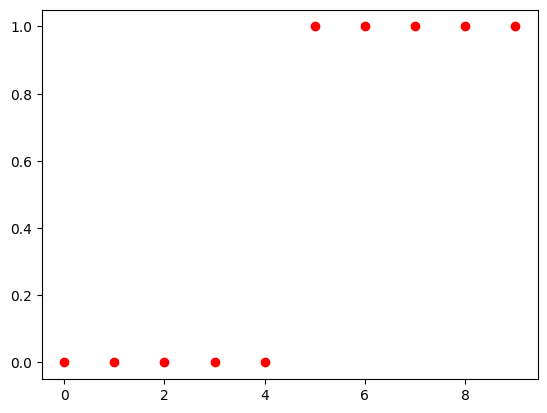

In [158]:
data = pd.DataFrame({'x': [0,1,2,3,4,5,6,7,8,9], 'y': [0,0,0,0,0,1,1,1,1,1]})

x = data.drop(columns=['y']).values
y = data.drop(columns=['x']).values
train_dataset = tf.data.Dataset.from_tensor_slices((x, y))

plt.plot(data['x'], data['y'], 'ro')

In [166]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data
X_train = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Define the model
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(1,))
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Predict probabilities
probabilities = model.predict(X_train)

# Convert probabilities to binary predictions
binary_predictions = (probabilities > 0.5).astype(int)

print("Binary Predictions:", binary_predictions.flatten())

TypeError: in user code:

    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\keras\losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\keras\backend.py:4990 binary_crossentropy
        epsilon_ = _constant_to_tensor(epsilon(), output.dtype.base_dtype)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\keras\backend.py:836 _constant_to_tensor
        return constant_op.constant(x, dtype=dtype)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\framework\constant_op.py:265 constant
        allow_broadcast=True)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\framework\constant_op.py:283 _constant_impl
        allow_broadcast=allow_broadcast))
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\framework\tensor_util.py:457 make_tensor_proto
        _AssertCompatible(values, dtype)
    D:\Programs\miniconda3\envs\tf-37\lib\site-packages\tensorflow\python\framework\tensor_util.py:337 _AssertCompatible
        (dtype.name, repr(mismatch), type(mismatch).__name__))

    TypeError: Expected int32, got 1e-07 of type 'float' instead.


In [159]:
weights, biases = model.layers[0].get_weights()
weights, biases

(array([[1.3815286]], dtype=float32), array([-5.9840026], dtype=float32))

## Two Perceptron Binary Classifier

In [168]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data
X_train = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]])
y_train = np.array([[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]])

# Define the model
model = Sequential([
    Dense(2, activation='softmax', input_shape=(1,))
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Accuracy: {accuracy}')

# Get predictions
probabilities = model.predict(X_train)
predictions = np.argmax(probabilities, axis=1)

print("Binary Predictions:", predictions)

Epoch 1/100
1/1 [==============================] - 0s 238ms/step - loss: 1.2341 - accuracy: 0.6000
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.9710 - accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7293 - accuracy: 0.6000
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5319 - accuracy: 0.7000
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4350 - accuracy: 0.8000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5116 - accuracy: 0.9000
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5978 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5645 - accuracy: 0.6000
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4730 - accuracy: 0.9000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3927 - accuracy: 1.0000
Epoch 11/100
1/1 [=========

## MNIST DataSet Recognizition

### Load and Preprocess Data

In [57]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np

ds = tfds.load('mnist')
train_ds, test_ds = ds['train'], ds['test']

def preprocess_data(features, labels=[]):
    features['image'] = features['image'] / 255
    features['image'] = tf.reshape(features['image'], [-1])
    return features['image'], features['label']

train_ds, test_ds = train_ds.map(preprocess_data), test_ds.map(preprocess_data)

ds, tf.data.experimental.cardinality(train_ds).numpy(), tf.data.experimental.cardinality(test_ds).numpy()

({'train': <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
  'test': <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>},
 60000,
 10000)

In [58]:
train_ds = train_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(32)

In [56]:
list(train_ds.take(1))[0][1]

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([4, 1, 0, 7, 8, 1, 2, 7, 1, 6, 6, 4, 7, 7, 3, 3, 7, 9, 9, 1, 0, 6,
       6, 9, 9, 4, 8, 9, 4, 7, 3, 3], dtype=int64)>

### Create and Run Model

In [50]:
inputs = layers.Input(shape=(28 * 28), name='image')

x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(10, activation='softmax', name='label')(x)

model = keras.Model(inputs=inputs, outputs=output)

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
label (Dense)                (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [51]:
x_train, y_train = np.array([np.zeros(784) for i in range(32)]), np.array([1 for i in range(32)])

In [52]:
history = model.fit(train_ds, epochs=10, verbose=2)
model.evaluate(test_ds)

Epoch 1/10
1875/1875 - 6s - loss: 0.2436 - accuracy: 0.9295
Epoch 2/10
1875/1875 - 6s - loss: 0.1030 - accuracy: 0.9695
Epoch 3/10
1875/1875 - 6s - loss: 0.0704 - accuracy: 0.9793
Epoch 4/10


KeyboardInterrupt: 

## New Section